# **Education Assessment in Egypt**
Egypt's education system has undergone significant reforms in recent years, with a focus on improving quality and accessibility. Education assessment plays a crucial role in this transformation, aiming to evaluate student learning outcomes and enhance the overall educational experience.

 Now, we are performing analysis by using the education dataset for Egypt.
 Dataset URL: https://www.kaggle.com/datasets/mohamedalabasy/education-in-egypt

**Setting Up Google Colab Basic Libraries**

In [155]:
import shutil
import os

# **Extract, Transform, Load (ETL)**

# **EXTRACT**

Extracting the dataset directly from the Kaggle API for further processing.

In [156]:
from google.colab import files
files.upload()  # use to upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rohailrasheed","key":"d755f485edd3fb92b8837db39584fd88"}'}

In [157]:
# Checking .kaggle directory if it doesn't exist
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Moving the uploaded kaggle.json to the .kaggle directory
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

# Setting permissions for the Kaggle API key
os.chmod('/root/.kaggle/kaggle.json', 0o600)

In [158]:
# Downloading Dataset zip file directly from API
!kaggle datasets download -d mohamedalabasy/education-in-egypt

Dataset URL: https://www.kaggle.com/datasets/mohamedalabasy/education-in-egypt
License(s): apache-2.0
education-in-egypt.zip: Skipping, found more recently modified local copy (use --force to force download)


In [159]:
# Unzipping the dataset zip file in Colab File Environment
!unzip education-in-egypt.zip -d /content/dataset

Archive:  education-in-egypt.zip
replace /content/dataset/egypt_education_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/dataset/egypt_education_dataset.csv  


**Uploading the necessary libraries for manipulation and visualizations**

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Viewing the Dataset from Different Aspects

We finds that the dataset is categorical by viewing it

In [161]:
print(os.listdir('/content/dataset'),"\n") # Printing the Dataset File Name

file_path = '/content/dataset/egypt_education_dataset.csv' # Dataset File Path
dataset = pd.read_csv(file_path) # Reading the Dataset
print(dataset.head(10)) # Printing 10 Rows of each column in a dataset

['egypt_education_dataset.csv'] 

       Student Name  Student Age Student year Father Degree Mother Degree  \
0      Allison Lang           18       Year 9   High School   High School   
1     Jaclyn Mcneil           14       Year 9      Bachelor           PhD   
2       Melissa Lee           16      Year 10           NaN           PhD   
3   Timothy Maxwell           14      Year 10      Bachelor      Bachelor   
4       Eric Steele           17      Year 11           PhD           NaN   
5     Gabriel Brown           15      Year 11      Bachelor        Master   
6  Carolyn Erickson           18      Year 10      Bachelor   High School   
7       Anna Mooney           14      Year 12        Master           PhD   
8      Aaron Mullen           15      Year 11           PhD           PhD   
9     Carrie Harvey           17       Year 9           PhD           NaN   

  Education Type   Subject_1   Subject_2  Subject_3  Subject_4  Subject_5  \
0             IB   72.236740   85.931149 

In [162]:
print(dataset.describe) # Describing the Dataset

<bound method NDFrame.describe of           Student Name  Student Age Student year Father Degree Mother Degree  \
0         Allison Lang           18       Year 9   High School   High School   
1        Jaclyn Mcneil           14       Year 9      Bachelor           PhD   
2          Melissa Lee           16      Year 10           NaN           PhD   
3      Timothy Maxwell           14      Year 10      Bachelor      Bachelor   
4          Eric Steele           17      Year 11           PhD           NaN   
...                ...          ...          ...           ...           ...   
49995     Bruce Vargas           15      Year 11           NaN        Master   
49996   Clarence Foley           16      Year 11           NaN           PhD   
49997      Dawn Palmer           14      Year 10           PhD           PhD   
49998     Albert Berry           15      Year 10           PhD      Bachelor   
49999      Amy Proctor           18      Year 12           PhD        Master   

     

In [163]:
# Checking the column name in list
print(dataset.columns.tolist())

['Student Name', 'Student Age', 'Student year', 'Father Degree', 'Mother Degree', 'Education Type', 'Subject_1', 'Subject_2', 'Subject_3', 'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7', 'Subject_8', 'Subject_9', 'Subject_10']


# **TRANSFORM**

# **Exploratory Data Analysis (EDA)**

# Heatmap
Creating the Heatmap to Check and Visualize the Null Values in the Dataset

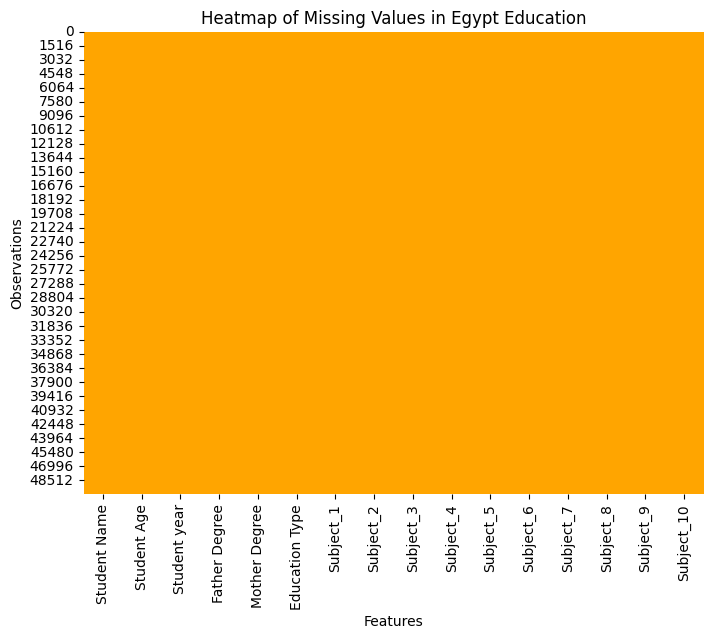

In [164]:
df = pd.DataFrame(dataset) # Creating a dataframe of Dataset
missing_mask = df.isnull() # Creating a variable with null values

plt.figure(figsize=(8, 6)) # Size for heatmap

# Creating Heatmap
sns.heatmap(missing_mask, cmap='viridis', cbar=False,
            linewidths=0.5, linecolor='orange')

plt.title('Heatmap of Missing Values in Egypt Education')
plt.xlabel('Features')
plt.ylabel('Observations')

plt.show() # Visualizing the Heatmap

**Now, Checking the Missing Values / Null Values columnwise**

In [165]:
print(missing_mask) # Checking Null Values

       Student Name  Student Age  Student year  Father Degree  Mother Degree  \
0             False        False         False          False          False   
1             False        False         False          False          False   
2             False        False         False           True          False   
3             False        False         False          False          False   
4             False        False         False          False           True   
...             ...          ...           ...            ...            ...   
49995         False        False         False           True          False   
49996         False        False         False           True          False   
49997         False        False         False          False          False   
49998         False        False         False          False          False   
49999         False        False         False          False          False   

       Education Type  Subject_1  Subje

**We can see that there are null values exist in some columns, so we need to remove these values.**

In [166]:
print(df.isnull().sum()) # Summing null values

Student Name          0
Student Age           0
Student year          0
Father Degree     10040
Mother Degree     10090
Education Type        0
Subject_1             0
Subject_2             0
Subject_3             0
Subject_4             0
Subject_5             0
Subject_6             0
Subject_7             0
Subject_8             0
Subject_9             0
Subject_10            0
dtype: int64


# Mode Imputation Technique

For filling out the Null Values in Categorical Data, we are using Mode Imputation Technique in particular columns because this techique behaves well in Categorical Datasets

In [167]:
# Mode Imputation
df['Father Degree'].fillna(df['Father Degree'].mode()[0], inplace=True)
df['Mother Degree'].fillna(df['Mother Degree'].mode()[0], inplace=True)

After applying Mode Imputation technique, now we can see that the null values have been filled.

In [168]:
print(df.isnull().sum()) # Again sum Null values

Student Name      0
Student Age       0
Student year      0
Father Degree     0
Mother Degree     0
Education Type    0
Subject_1         0
Subject_2         0
Subject_3         0
Subject_4         0
Subject_5         0
Subject_6         0
Subject_7         0
Subject_8         0
Subject_9         0
Subject_10        0
dtype: int64


In [169]:
print(df.describe) # Again describe dataset to see updated values

<bound method NDFrame.describe of           Student Name  Student Age Student year Father Degree Mother Degree  \
0         Allison Lang           18       Year 9   High School   High School   
1        Jaclyn Mcneil           14       Year 9      Bachelor           PhD   
2          Melissa Lee           16      Year 10      Bachelor           PhD   
3      Timothy Maxwell           14      Year 10      Bachelor      Bachelor   
4          Eric Steele           17      Year 11           PhD      Bachelor   
...                ...          ...          ...           ...           ...   
49995     Bruce Vargas           15      Year 11      Bachelor        Master   
49996   Clarence Foley           16      Year 11      Bachelor           PhD   
49997      Dawn Palmer           14      Year 10           PhD           PhD   
49998     Albert Berry           15      Year 10           PhD      Bachelor   
49999      Amy Proctor           18      Year 12           PhD        Master   

     

**Now, it is time to check which columns consists of Non-Numeric data**

In [170]:
# select non-numeric columns and convert it into list to understand better
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:", non_numeric_columns) # print list

Non-numeric columns: ['Student Name', 'Student year', 'Father Degree', 'Mother Degree', 'Education Type']


**We have to encode nun numeric values to check their relationships in Correlation Matrix and for model acceptance.**

In [171]:
# import necessary libraries for encoding
from sklearn.preprocessing import LabelEncoder

In [172]:
for column in non_numeric_columns:
  # seperate label encoder for diff columns
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# after converting into numeric, check their datatype
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student Name    50000 non-null  int64  
 1   Student Age     50000 non-null  int64  
 2   Student year    50000 non-null  int64  
 3   Father Degree   50000 non-null  int64  
 4   Mother Degree   50000 non-null  int64  
 5   Education Type  50000 non-null  int64  
 6   Subject_1       50000 non-null  float64
 7   Subject_2       50000 non-null  float64
 8   Subject_3       50000 non-null  float64
 9   Subject_4       50000 non-null  float64
 10  Subject_5       50000 non-null  float64
 11  Subject_6       50000 non-null  float64
 12  Subject_7       50000 non-null  float64
 13  Subject_8       50000 non-null  float64
 14  Subject_9       50000 non-null  float64
 15  Subject_10      50000 non-null  float64
dtypes: float64(10), int64(6)
memory usage: 6.1 MB
None


**After that, we need to remove unnecessary non-numeric data column to make dataset more clean**


In [173]:
# removing non numeric dataset and saves updated dataset into new variable
temporary_df = df.drop(['Student Name'], axis=1)
print(temporary_df.head(10))

   Student Age  Student year  Father Degree  Mother Degree  Education Type  \
0           18             3              1              1               0   
1           14             3              0              3               0   
2           16             0              0              3               0   
3           14             0              0              0               2   
4           17             1              3              0               1   
5           15             1              0              2               0   
6           18             0              0              1               1   
7           14             2              2              3               2   
8           15             1              3              3               2   
9           17             3              3              0               1   

    Subject_1   Subject_2  Subject_3  Subject_4  Subject_5  Subject_6  \
0   72.236740   85.931149  65.698513  84.163844  78.179414  50.57820

**After removing the non-numeric data, again check the data type of remaining dataset**

In [174]:
temporary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student Age     50000 non-null  int64  
 1   Student year    50000 non-null  int64  
 2   Father Degree   50000 non-null  int64  
 3   Mother Degree   50000 non-null  int64  
 4   Education Type  50000 non-null  int64  
 5   Subject_1       50000 non-null  float64
 6   Subject_2       50000 non-null  float64
 7   Subject_3       50000 non-null  float64
 8   Subject_4       50000 non-null  float64
 9   Subject_5       50000 non-null  float64
 10  Subject_6       50000 non-null  float64
 11  Subject_7       50000 non-null  float64
 12  Subject_8       50000 non-null  float64
 13  Subject_9       50000 non-null  float64
 14  Subject_10      50000 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 5.7 MB


**Checking the relation between variables in a dataset. So, It shows that there is no such relation between dataset variables.**

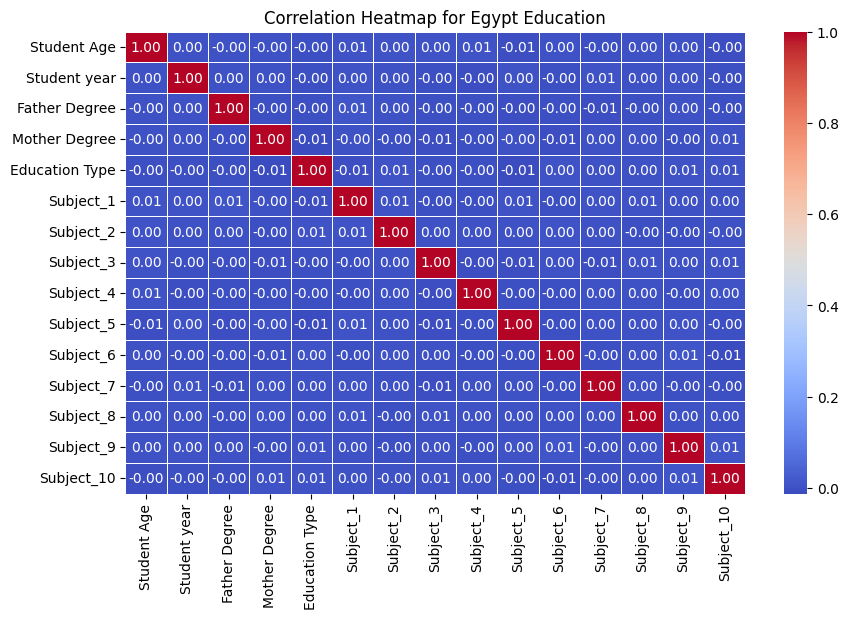

In [175]:
corr = temporary_df.corr()

# size for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True,
            fmt='.2f', linewidths=0.5)

#print correlation matrix
plt.title('Correlation Heatmap for Egypt Education')
plt.show()

# Checking Noises and Abnormalities in Data

**Determine Quartiles in dataset and verify**
We find some noises in dataset

In [176]:
# evaluate upper and lower quartiles
lower_quantile = temporary_df.quantile(0.01)
upper_quantile = temporary_df.quantile(0.99)

#print upper and lower quartiles
print(f"Lower Threshold (1st Percentile)\n: {lower_quantile}")
print(f"Upper Threshold (99th Percentile)\n: {upper_quantile}")

# Detecting outliers
outliers2 = temporary_df[(temporary_df < lower_quantile) | (temporary_df > upper_quantile)]
print(f"\n\n Outliers: {outliers2}")

Lower Threshold (1st Percentile)
: Student Age       14.000000
Student year       0.000000
Father Degree      0.000000
Mother Degree      0.000000
Education Type     0.000000
Subject_1         40.364149
Subject_2         40.235761
Subject_3         40.379497
Subject_4         40.145013
Subject_5         40.382555
Subject_6         39.800932
Subject_7         39.924881
Subject_8         39.902079
Subject_9         39.916018
Subject_10        40.218021
Name: 0.01, dtype: float64
Upper Threshold (99th Percentile)
: Student Age        18.0
Student year        3.0
Father Degree       3.0
Mother Degree       3.0
Education Type      2.0
Subject_1         100.0
Subject_2         100.0
Subject_3         100.0
Subject_4         100.0
Subject_5         100.0
Subject_6         100.0
Subject_7         100.0
Subject_8         100.0
Subject_9         100.0
Subject_10        100.0
Name: 0.99, dtype: float64


 Outliers:        Student Age  Student year  Father Degree  Mother Degree  \
0              N

Counting the noisy data in a dataset

In [177]:
print(outliers2.count())

Student Age         0
Student year        0
Father Degree       0
Mother Degree       0
Education Type      0
Subject_1         500
Subject_2         500
Subject_3         500
Subject_4         500
Subject_5         500
Subject_6         500
Subject_7         500
Subject_8         500
Subject_9         500
Subject_10        500
dtype: int64


# Median Calculation Technique
Using this approach to remove noisy data in a dataset

In [178]:
# Calculate median for each column
median_values = temporary_df.median()

# function to calculate mean of noisy data
def replace_outliers_with_median(column):
    return np.where((column < lower_quantile[column.name]) | (column > upper_quantile[column.name]),
                    median_values[column.name],
                    column)

# applying function to noisy data in a dataset
temporary_df = temporary_df.apply(replace_outliers_with_median)

print(f"\nDataset with Outliers Replaced by Median: {temporary_df}")


Dataset with Outliers Replaced by Median:        Student Age  Student year  Father Degree  Mother Degree  \
0             18.0           3.0            1.0            1.0   
1             14.0           3.0            0.0            3.0   
2             16.0           0.0            0.0            3.0   
3             14.0           0.0            0.0            0.0   
4             17.0           1.0            3.0            0.0   
...            ...           ...            ...            ...   
49995         15.0           1.0            0.0            2.0   
49996         16.0           1.0            0.0            3.0   
49997         14.0           0.0            3.0            3.0   
49998         15.0           0.0            3.0            0.0   
49999         18.0           2.0            3.0            2.0   

       Education Type   Subject_1   Subject_2  Subject_3   Subject_4  \
0                 0.0   72.236740   85.931149  65.698513   84.163844   
1                 0.

After implementing Median Calculation Technique, now again we check the noisy data and finds that the noisy data removes.

In [179]:
outliers2 = temporary_df[(temporary_df < lower_quantile) | (temporary_df > upper_quantile)]
print(f"Outliers: {outliers2}")

Outliers:        Student Age  Student year  Father Degree  Mother Degree  \
0              NaN           NaN            NaN            NaN   
1              NaN           NaN            NaN            NaN   
2              NaN           NaN            NaN            NaN   
3              NaN           NaN            NaN            NaN   
4              NaN           NaN            NaN            NaN   
...            ...           ...            ...            ...   
49995          NaN           NaN            NaN            NaN   
49996          NaN           NaN            NaN            NaN   
49997          NaN           NaN            NaN            NaN   
49998          NaN           NaN            NaN            NaN   
49999          NaN           NaN            NaN            NaN   

       Education Type  Subject_1  Subject_2  Subject_3  Subject_4  Subject_5  \
0                 NaN        NaN        NaN        NaN        NaN        NaN   
1                 NaN        NaN     

Again count the noisy data to verify that it removes

In [180]:
print(outliers2.count())

Student Age       0
Student year      0
Father Degree     0
Mother Degree     0
Education Type    0
Subject_1         0
Subject_2         0
Subject_3         0
Subject_4         0
Subject_5         0
Subject_6         0
Subject_7         0
Subject_8         0
Subject_9         0
Subject_10        0
dtype: int64


**Check all the variables in the list form**

In [181]:
test_1 = temporary_df.columns.tolist()
print(test_1)

['Student Age', 'Student year', 'Father Degree', 'Mother Degree', 'Education Type', 'Subject_1', 'Subject_2', 'Subject_3', 'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7', 'Subject_8', 'Subject_9', 'Subject_10']


# Z-Score Test
Again verify the noise and inconsistencies in data by using Z-Score Test

In [182]:
from scipy import stats

# Calculate z-scores for the specified column(s)
z_scores = stats.zscore(temporary_df[test_1])

# Identify outliers based on z-scores
outliers_mask = (z_scores > 3) | (z_scores < -3)

# Extract outliers from the original DataFrame
outliers1 = temporary_df[outliers_mask]

# Print the outliers
print(outliers1)


       Student Age  Student year  Father Degree  Mother Degree  \
0              NaN           NaN            NaN            NaN   
1              NaN           NaN            NaN            NaN   
2              NaN           NaN            NaN            NaN   
3              NaN           NaN            NaN            NaN   
4              NaN           NaN            NaN            NaN   
...            ...           ...            ...            ...   
49995          NaN           NaN            NaN            NaN   
49996          NaN           NaN            NaN            NaN   
49997          NaN           NaN            NaN            NaN   
49998          NaN           NaN            NaN            NaN   
49999          NaN           NaN            NaN            NaN   

       Education Type  Subject_1  Subject_2  Subject_3  Subject_4  Subject_5  \
0                 NaN        NaN        NaN        NaN        NaN        NaN   
1                 NaN        NaN        NaN    

Count the noise in data and find that there is no noise left in the data

In [183]:
print(outliers1.count())

Student Age       0
Student year      0
Father Degree     0
Mother Degree     0
Education Type    0
Subject_1         0
Subject_2         0
Subject_3         0
Subject_4         0
Subject_5         0
Subject_6         0
Subject_7         0
Subject_8         0
Subject_9         0
Subject_10        0
dtype: int64


Calculate the Average Marks of all the subject for processing because it is difficult to use multiple subjects

In [184]:
# List of subject columns you want to average
subject_columns = [f'Subject_{i}' for i in range(1, 11)]

# Calculate the mean of the specified columns and save it in a new column
temporary_df['Mean Subject Score'] = temporary_df[subject_columns].mean(axis=1)

# Optionally, save the updated DataFrame back to a CSV
temporary_df.to_csv('egypt_education_dataset.csv', index=False)

# Display the updated DataFrame
print(temporary_df.head())

   Student Age  Student year  Father Degree  Mother Degree  Education Type  \
0         18.0           3.0            1.0            1.0             0.0   
1         14.0           3.0            0.0            3.0             0.0   
2         16.0           0.0            0.0            3.0             0.0   
3         14.0           0.0            0.0            0.0             2.0   
4         17.0           1.0            3.0            0.0             1.0   

    Subject_1   Subject_2  Subject_3  Subject_4  Subject_5  Subject_6  \
0   72.236740   85.931149  65.698513  84.163844  78.179414  50.578209   
1   91.603078   73.186427  64.240239  47.786542  83.138581  66.913702   
2  100.000000   83.985923  89.378162  82.446853  86.368818  90.347020   
3   91.082131  100.000000  78.802220  78.447670  64.606239  82.045421   
4   74.906144   69.518146  65.284841  56.317028  69.758140  85.810641   

    Subject_7  Subject_8  Subject_9  Subject_10  Mean Subject Score  
0   70.071681  80.2945

In [185]:
print(temporary_df.info()) # check datatypes of updated dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student Age         50000 non-null  float64
 1   Student year        50000 non-null  float64
 2   Father Degree       50000 non-null  float64
 3   Mother Degree       50000 non-null  float64
 4   Education Type      50000 non-null  float64
 5   Subject_1           50000 non-null  float64
 6   Subject_2           50000 non-null  float64
 7   Subject_3           50000 non-null  float64
 8   Subject_4           50000 non-null  float64
 9   Subject_5           50000 non-null  float64
 10  Subject_6           50000 non-null  float64
 11  Subject_7           50000 non-null  float64
 12  Subject_8           50000 non-null  float64
 13  Subject_9           50000 non-null  float64
 14  Subject_10          50000 non-null  float64
 15  Mean Subject Score  50000 non-null  float64
dtypes: f

# Data Visualization

# Line Plot to visualize Mean Subject score
Visualize the pattern of students mean subject marks

**Findings: Student Performance Evaluation**

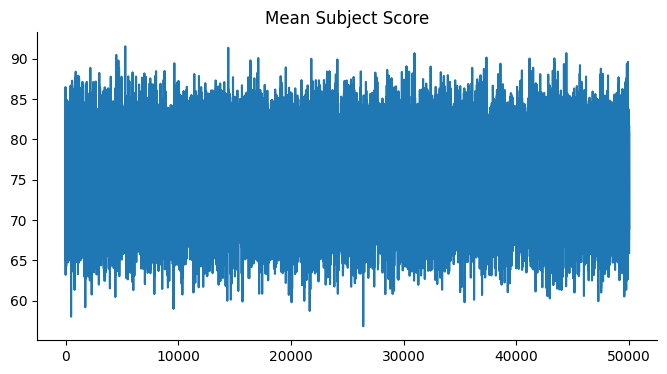

In [186]:
temporary_df['Mean Subject Score'].plot(kind='line', figsize=(8, 4), title='Mean Subject Score')
plt.gca().spines[['top', 'right']].set_visible(False)

# Scatter Plot to visualize how Education Type is affected by specific Subject Score
Visualize Education Type with respect to Student Mean Score through Scatter Plot.

**Findings: Mean Subject Score Trend with respect to Education Type**

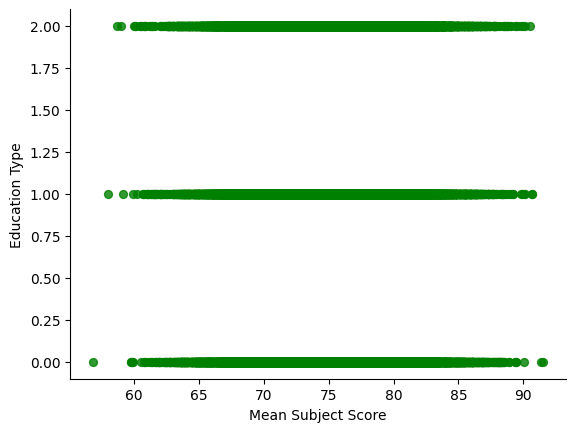

In [187]:
temporary_df.plot(kind='scatter', x='Mean Subject Score', y='Education Type', color='green', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Histogram to visualize how student Subject Score varies across different Education Types
Visualize Education Tupe with respect to Student Mean Score through Histogram.

**Findings: Mean Subject Score Trend with respect to Education Type**

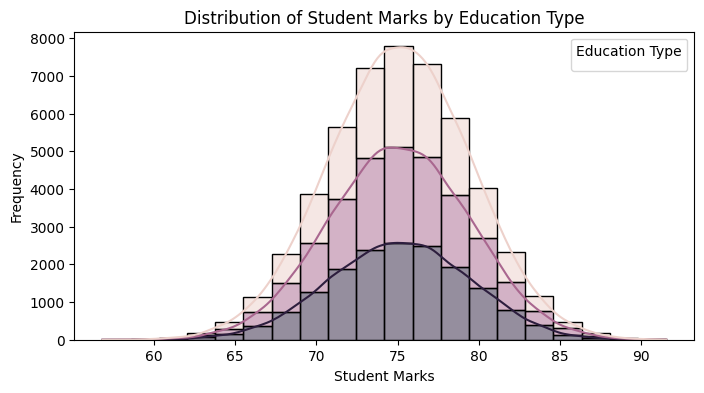

In [188]:
plt.figure(figsize=(8, 4))
sns.histplot(data=temporary_df, x='Mean Subject Score',
             hue='Education Type', bins=20, kde=True, multiple='stack')
plt.title('Distribution of Student Marks by Education Type')
plt.xlabel('Student Marks')
plt.ylabel('Frequency')
plt.legend(title='Education Type')
plt.show()

# FacetGrid to represent how subject scores varies with education type
Visualize Education Type with respect to Student Mean Score through Pair Plot.

**Findings: Mean Subject Score Trend with respect to Education Type**

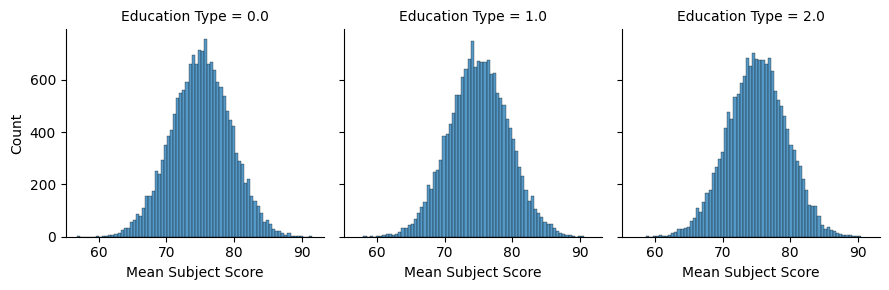

In [189]:
g = sns.FacetGrid(temporary_df, col='Education Type')
g.map(sns.histplot, 'Mean Subject Score')

# Scatterplot to visualize how Student Age varies with the particular Subject Score
Visualize how Student Age varies with Student Mean Score and specific Educaion type through Scatter Plot.

**Findings: Age Distribution by Student Mean Subject Score for particular Education Type**

<Axes: xlabel='Student Age', ylabel='Mean Subject Score'>

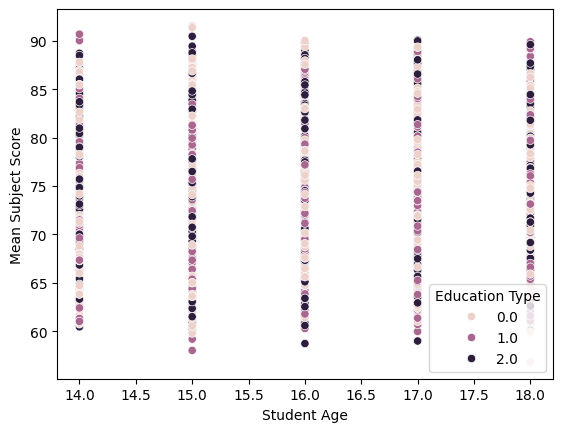

In [190]:
sns.scatterplot(data=temporary_df, x='Student Age', y='Mean Subject Score', hue='Education Type')

# Violen Plot to visualize how Student Age varies with Education Type
Visualize how Student Age varies with specific Educaion type through Violen Plot.

**Findings: Age Distribution by Education Type**

<Axes: xlabel='Student Age', ylabel='Education Type'>

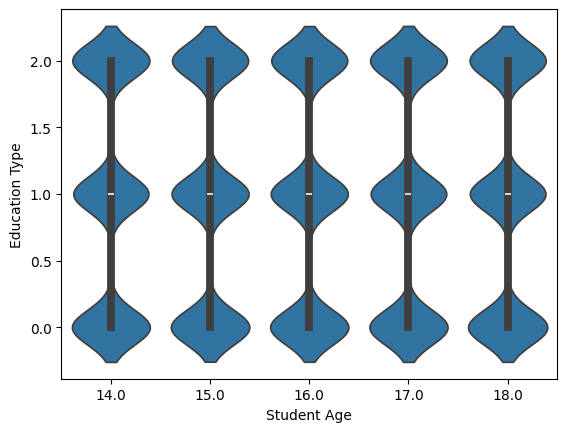

In [191]:
sns.violinplot(data=temporary_df, x='Student Age', y='Education Type')

In [192]:
temporary_df.head(10) # describe dataset

,Student Age,Student year,Father Degree,Mother Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10,Mean Subject Score
0,18.0,3.0,1.0,1.0,0.0,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678,71.894448
1,14.0,3.0,0.0,3.0,0.0,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158,72.512281
2,16.0,0.0,0.0,3.0,0.0,100.000000,83.985923,89.378162,82.446853,86.368818,90.347020,100.000000,83.972296,69.212961,79.206634,86.491867
3,14.0,0.0,0.0,0.0,2.0,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706,80.378611
4,17.0,1.0,3.0,0.0,1.0,74.906144,69.518146,65.284841,56.317028,69.758140,85.810641,63.776955,61.802599,84.951132,68.146467,70.027209
5,15.0,1.0,0.0,2.0,0.0,72.529418,84.630127,88.036813,83.419565,95.994759,81.416093,78.758795,46.535227,77.553887,59.407396,76.828208
6,18.0,0.0,0.0,1.0,1.0,83.733170,53.490681,64.176832,74.788082,64.961130,69.594212,80.826295,72.337257,88.716768,93.395562,74.601999
7,14.0,2.0,2.0,3.0,2.0,61.324515,65.694727,56.516955,76.300636,78.025103,71.510545,64.870428,45.915520,42.069972,69.812132,63.204053
8,15.0,1.0,3.0,3.0,2.0,69.819967,74.916854,76.873535,49.365484,67.708957,61.409847,74.602374,75.597677,85.594564,80.016017,71.590528
9,17.0,3.0,3.0,0.0,1.0,52.064120,75.201754,80.705790,67.390144,78.045191,69.355050,82.103080,71.724884,70.873844,61.598956,70.906281


# **LOAD**

Removing multiple subject scores and replace it with Mean Subject Score

In [193]:
# Array to store variables that need to be skip
columns_to_skip = []

for i in range((temporary_df.shape[1])):
  if f"Subject_{i+1}" in temporary_df.columns:
    columns_to_skip.append(f"Subject_{i+1}")
  elif "Education Type" in temporary_df.columns:
    columns_to_skip.append("Education Type")
  else:
    break

test2 = temporary_df.drop(columns=columns_to_skip).columns.tolist()
print(test2)

['Student Age', 'Student year', 'Father Degree', 'Mother Degree', 'Mean Subject Score']


# Applying for a Logistic Regression Model
We use Logistic Regression as it is more suitable for the classication Problems

In [194]:
# import all necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**The X contain Input Variable and Y contain Target variable**

In [195]:
X = temporary_df[test2]
y = temporary_df['Education Type']

**Split variables into Train and Test**

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,
                            y, test_size=0.2, random_state=42)

# Preparing a model

In [197]:
# Create the model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

LogisticRegression()

**For Predicting Accuracy model**

In [198]:
# Make predictions
y_pred = model.predict(X_test)

In [199]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.34


**For evaluating Confusion Matrix**

In [200]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix: {conf_matrix}')


Confusion Matrix: [[2559  128  721]
 [2482  130  732]
 [2375  127  746]]


**For checking Detailed Parameters**

In [201]:
class_report = classification_report(y_test, y_pred)
print('\nClassification Report: {class_report}')


Classification Report: {class_report}


**For Making Predictions across Input Variable**

In [202]:
# Make predictions
predictions = model.predict([[18.0, 3.0, 1.0, 1.0, 71.894448]])
print(f'Predictions: {predictions}')

Predictions: [0.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [203]:
type(predictions) # check datatype

numpy.ndarray

**Decode The Predicted Value**

In [204]:
decoded_target = le.inverse_transform([int(predictions[0])])
print(f'Decoded Target: {decoded_target}')

Decoded Target: ['IB']


# Applying Decision Tree Algorithm
The Decision Tree Algorithm focuses on classification problems in detail/depth

In [205]:
from sklearn.tree import DecisionTreeClassifier

**Set Input (X1) and Target (y1) variable**

In [206]:
X1 = temporary_df[test2]
y1 = temporary_df['Education Type']

y1_encoded = le.fit_transform(y1)

**Split the variables into Train/Test**

In [207]:
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1_encoded,
                                            test_size=0.2, random_state=42)

**Apply model and see insights**

In [208]:
# Create the Decision Tree model
model1 = DecisionTreeClassifier(random_state=42)

# Fit the model
model1.fit(X1_train, y1_train)

# Make predictions
y1_pred = model1.predict(X1_test)

**For predicting Accuracy**

In [209]:
accuracy1 = accuracy_score(y1_test, y1_pred)
print(f'Accuracy: {accuracy1:.2f}')

Accuracy: 0.33


**For predicting Confusion Matrix**

In [210]:
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
print(f'\nConfusion Matrix: {conf_matrix1}')


Confusion Matrix: [[1173 1082 1153]
 [1145 1092 1107]
 [1130 1036 1082]]


**For predicting Detailed Parameters**

In [211]:
class_report1 = classification_report(y1_test, y1_pred)
print(f'\nClassification Report: {class_report1}')


Classification Report:               precision    recall  f1-score   support

           0       0.34      0.34      0.34      3408
           1       0.34      0.33      0.33      3344
           2       0.32      0.33      0.33      3248

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.33      0.33      0.33     10000



**To check variable names in a list due to the better understanding**

In [212]:
# checking Variable names in a list
print(temporary_df.columns.tolist())

['Student Age', 'Student year', 'Father Degree', 'Mother Degree', 'Education Type', 'Subject_1', 'Subject_2', 'Subject_3', 'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7', 'Subject_8', 'Subject_9', 'Subject_10', 'Mean Subject Score']


Now, we previously implemented classification algorithms and find that there is no appropiate accuracy achieved.

Now, we are using Regression Algorithms and check response.

# Applying XGBoost Algorithm
Now, we are using XGBoost Algorithm to check accuracy.

In [213]:
#import necessary libraries
import xgboost as xgb

**Setting up Input (X) and Output (y) variables**

In [214]:
# Prepare your features and target
X2 = temporary_df[test2]
y2 = temporary_df['Education Type']

**Splitting the variables**

In [215]:
# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                  y2, test_size=0.2, random_state=42)

# Applying Model

In [216]:
# Create the XGBoost model
model2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
model2.fit(X2_train, y2_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:34:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [217]:
y2_pred = model2.predict(X2_test)

**Calculating Accuracy**

In [218]:
# Calculate accuracy
accuracy2 = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy2:.2f}')

Accuracy: 0.33


**Calculating Confusion Matrix**

In [219]:
# Confusion matrix
conf_matrix2 = confusion_matrix(y2_test, y2_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')


Confusion Matrix:
[[2559  128  721]
 [2482  130  732]
 [2375  127  746]]


**Calculating Detaied Parameter**

In [220]:
# Classification report
class_report2 = classification_report(y2_test, y2_pred)
print('\nClassification Report:\n', class_report2)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.34      0.35      0.34      3408
         1.0       0.33      0.31      0.32      3344
         2.0       0.33      0.35      0.34      3248

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.33      0.33      0.33     10000



**Make Predictions**

In [221]:
# Make predictions for a new sample
predictions2 = model2.predict([[18.0, 3.0, 1.0, 1.0, 71.894448]])
print(f'Predictions: {predictions2}')

Predictions: [0]


**Now, we could see that the accuracy by applying XGBoost also not improved.**

**Now, we have 2 choices, either create new discrete variables (classification) for model prediction or to target those continous variables (regression) and applying linear regression model.**

In [222]:
print(temporary_df.columns.tolist())

['Student Age', 'Student year', 'Father Degree', 'Mother Degree', 'Education Type', 'Subject_1', 'Subject_2', 'Subject_3', 'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7', 'Subject_8', 'Subject_9', 'Subject_10', 'Mean Subject Score']


In [223]:
marks = temporary_df.drop(columns=['Student Age', 'Student year', 'Father Degree', 'Mother Degree', 'Education Type', 'Mean Subject Score'])

In [224]:
print(marks.columns.tolist())

['Subject_1', 'Subject_2', 'Subject_3', 'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7', 'Subject_8', 'Subject_9', 'Subject_10']


# Applying Multiple Regression Algorithm

In [225]:
# import all necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

**Set Input (X3) and Target (Y3) Variable**

In [226]:
X3 = temporary_df[marks.columns.tolist()]
y3 = temporary_df['Mean Subject Score']

**Split the variables**

In [227]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,
                          y3, test_size=0.2, random_state=42)

# Model  Implementation

In [228]:
# Create the model
model3 = LinearRegression()

# Fit the model
model3.fit(X3_train, y3_train)

LinearRegression()

# Predict Value by giving values for the Input Variables

In [229]:
print(model3.predict([[72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678]]))

[71.8944478]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Make Predictions**

In [230]:
# Make predictions
y3_pred = model3.predict(X3_test)
mae = mean_absolute_error(y3_test, y3_pred)
mse = mean_squared_error(y3_test, y3_pred)
r2 = r2_score(y3_test, y3_pred)

**Print Predictions**

In [231]:
# Print metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Accuracy Score (R-squared): {r2:.2f}')

Mean Absolute Error: 0.00
Mean Squared Error: 0.00
Accuracy Score (R-squared): 1.00


**The Linear Regression model achieve accurate prediction score. Hence, it proves that this particular dataset cannot work on classification Algorithms.**

**There are two ways to resolve this issue, either create new descrete variables with the existing variables or use regression algorithms for continous variables.**

**Note: The model achieves 100% accuray on my created target variable. It is only for check that the data is working good on the regression problems as the target variable is the mean calculation of input variables, that is the reason the model achieved 100% accuracy.**